In [1]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from MVAE import *
import cv2 

In [2]:
device = torch.device(1 if torch.cuda.is_available() else 0)
device

device(type='cuda', index=1)

In [8]:
import constDirectories as ct

In [4]:
import skimage.measure as skm
import pandas as pd
from PIL import Image
import os

In [5]:
class SeismicImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, label_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = label_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        filename = self.img_labels.iloc[idx, 0] + '.png'
        img_path = os.path.join(self.img_dir, filename)
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.label_transform:
            label = self.label_transform(label)
        return image, label

In [10]:
transform = transforms.Compose([transforms.Resize((64 , 64)),
                                transforms.Grayscale(num_output_channels=1)
                                ,transforms.ToTensor()])
masksDS = SeismicImageDataset(ct.TRAIN_CSV,ct.TRAIN_IMAGE_DIR,transform)

In [12]:
dataloaderCustomDS = DataLoader(masksDS, batch_size=64, shuffle=True)

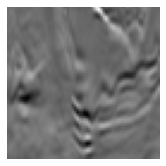

In [13]:
tensorImg = masksDS[6][0]
numpyImg = tensorImg.numpy()[0]
#Pooling = skimage.measure.block_reduce(numpyImg, (2,2), np.max) 
plt.figure()
plt.subplot(1, 2, 1); plt.imshow(numpyImg,  cmap='gray');  plt.axis('off')
#plt.subplot(1, 2, 2); plt.imshow(mPooling,cmap = 'gray' ); plt.axis('off')
plt.show()

torch.Size([64, 1, 64, 64])


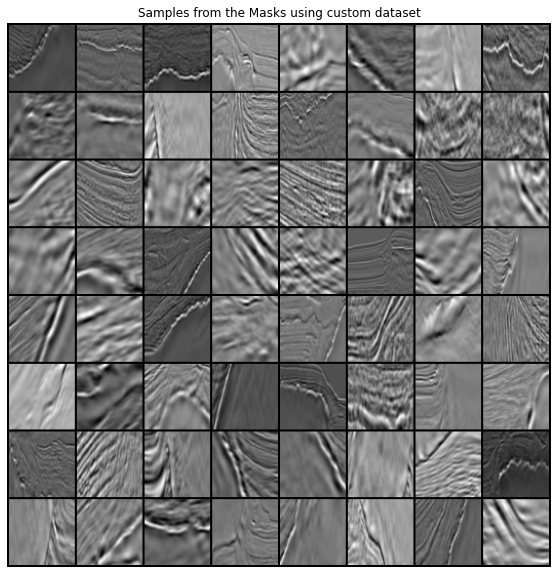

In [14]:
it=iter(dataloaderCustomDS)
real_batch = next(iter(it))
plt.figure(figsize=(10,10))
print(real_batch[0].size())
plt.imshow(np.transpose(utils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)),cmap='gray')
plt.axis('off')
plt.title('Samples from the Masks using custom dataset');
plt.show()